# DATA DESCRIPTION

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO).

The study is primarily limited  only to students with engineering disciplines. 

The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations)

along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills.

The dataset also contains demographic features. 

The dataset  contains  around  40 independent variables and 4000 data points.

The independent variables are both continuous and categorical in nature.

The dataset contains a unique identifier for each candidate. 


In [11]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

import plotly
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
import plotly.io as pio

cf.go_offline()
init_notebook_mode(connected=True)
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import kruskal


In [4]:
df = pd.read_excel("AMEO_DATA.xlsx")

In [5]:
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [ ]:
df.shape

(3998, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [ ]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

- The data does not have any null values in the data

In [ ]:
# drop Unnamed column as it not necessary
df['Unnamed: 0'].value_counts()

train    3998
Name: Unnamed: 0, dtype: int64

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3998.0,663794.540520,363218.245829,11244.0000,334284.250000,639600.000000,990480.000000,1.298275e+06
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00


## Univariate Analysis

In [ ]:
df.shape

(3998, 38)

In [ ]:
df['Salary'].mean()

307699.8499249625

In [ ]:
df['Salary'].median()

300000.0

In [ ]:
df['Designation'].nunique()

419

In [ ]:
df['JobCity'].nunique()

339

<AxesSubplot:xlabel='Gender', ylabel='count'>

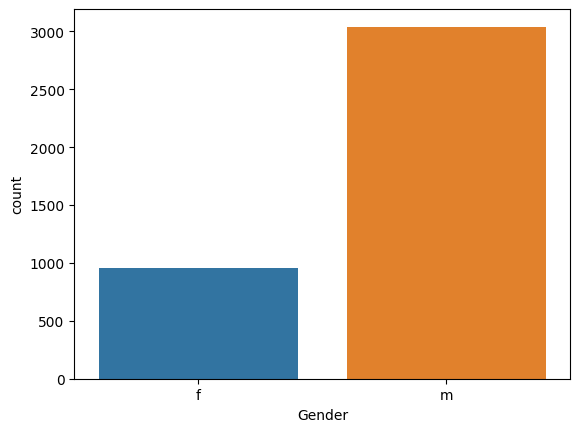

In [ ]:
sns.countplot(x=df['Gender'])

- As we can see from the plot males count is more than females

<AxesSubplot:xlabel='count', ylabel='12graduation'>

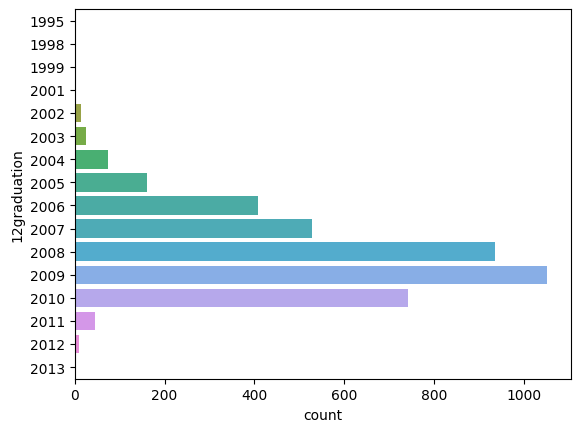

In [ ]:
sns.countplot(y =df['12graduation'])

<Axes: ylabel='Density'>

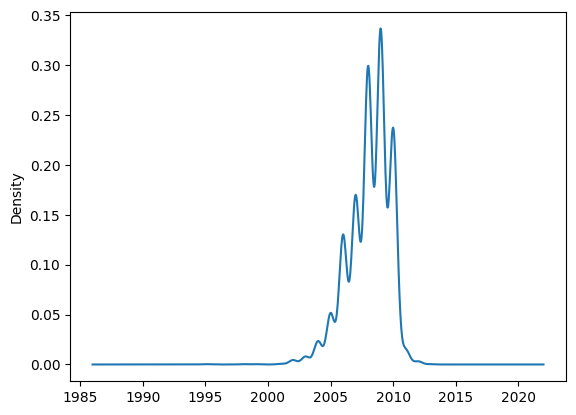

In [6]:
df['12graduation'].plot(kind = 'kde')

- from the above plot we can see that 2009 year has the more 12th graduated caandidates.

<AxesSubplot:xlabel='CollegeTier', ylabel='count'>

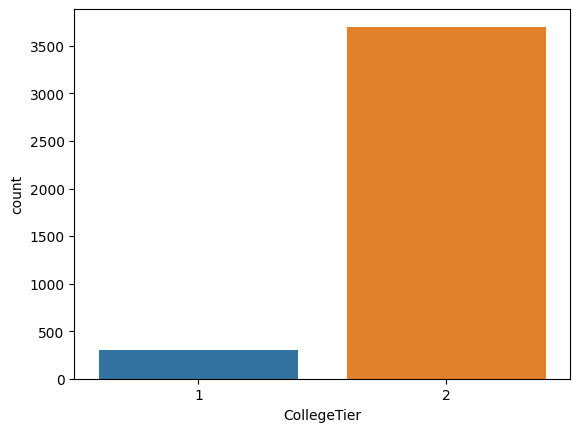

In [ ]:
sns.countplot(x =df['CollegeTier'])

- from the above plot we can observe that the dataset contains much more students from Teir 2 college.

<AxesSubplot:xlabel='Degree', ylabel='count'>

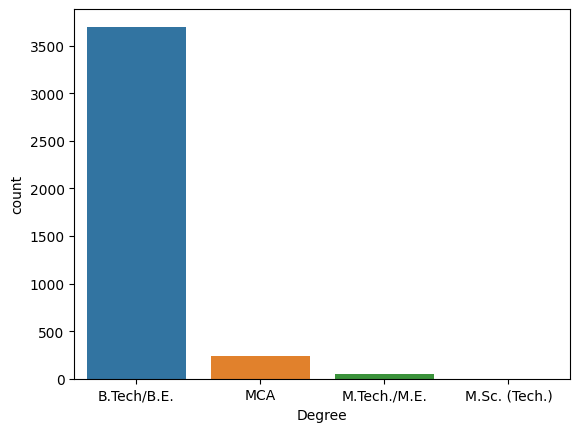

In [ ]:
sns.countplot(x=df['Degree'])

- From above plot we can see that B.Tech/B.E students are very high count most of the students are B.Tech/B.E graduates.

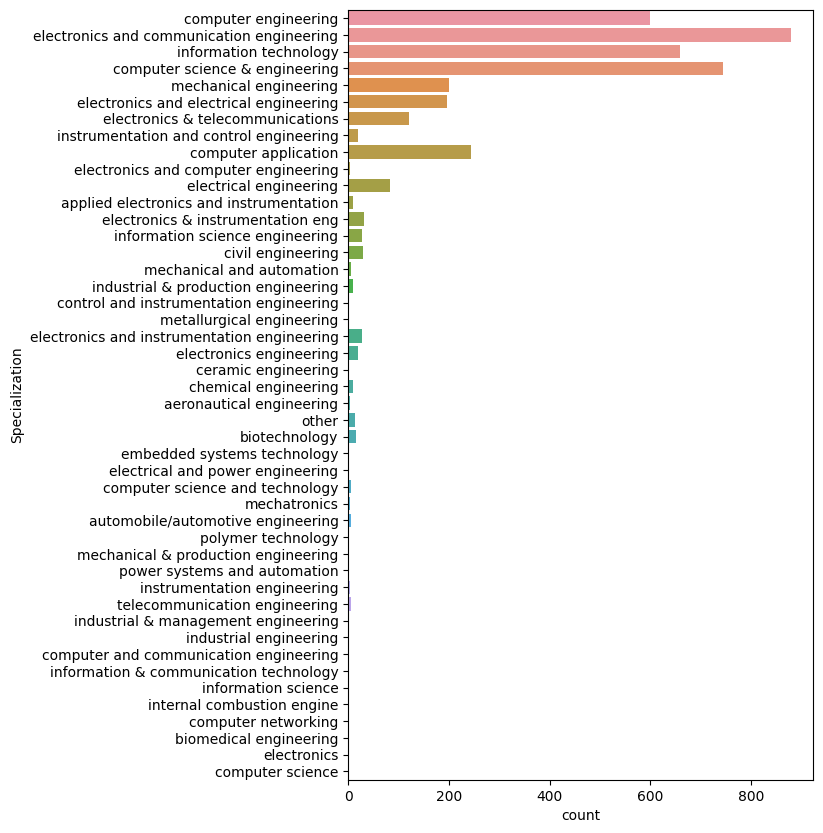

In [8]:
plt.figure(figsize = (6,10))
sns.countplot(y=df['Specialization'])
plt.show()

- From the plot above we observe that Electronics and communication is having more count and computer science & engineering. It means that mostlly students has the specialoization in electronics and computer science.

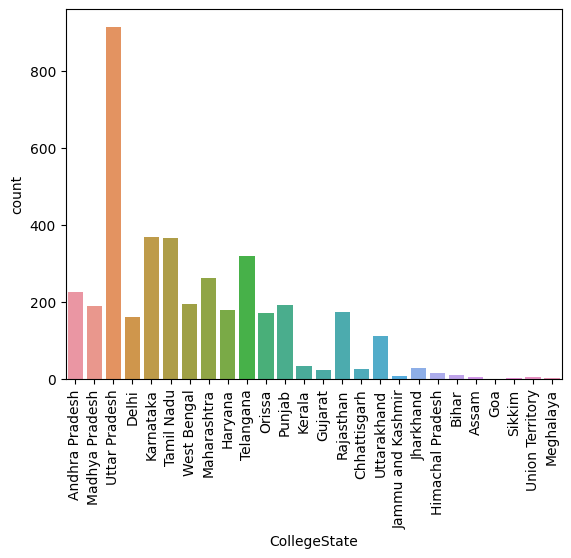

In [ ]:
sns.countplot(x=df['CollegeState'])
plt.xticks(rotation='vertical')
plt.show()

- From the above plot most of the students are from Uttar Pardesh and very less are from Meghalaya

<AxesSubplot:xlabel='GraduationYear', ylabel='count'>

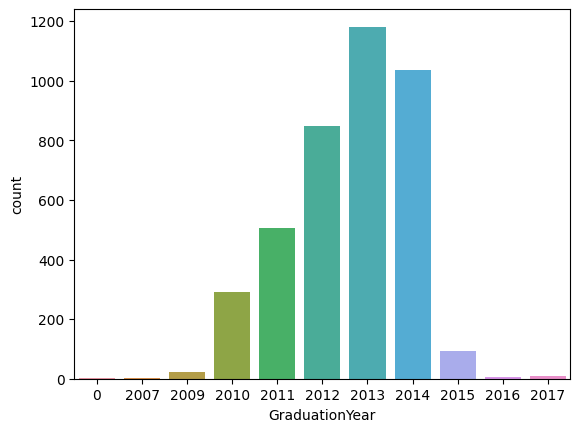

In [ ]:
sns.countplot(x=df['GraduationYear'])

- Above graph shows that we have more 2013 graduates and very less 2007,2016,2017 graduates in the dataset.

In [ ]:
a=df['Designation'].value_counts()[:30].iplot(kind='bar',color= 'black',asFigure=True)
pio.write_image(a, 'Designation.png')

![Top 30 Designation with High Salary](images/Designation.png)


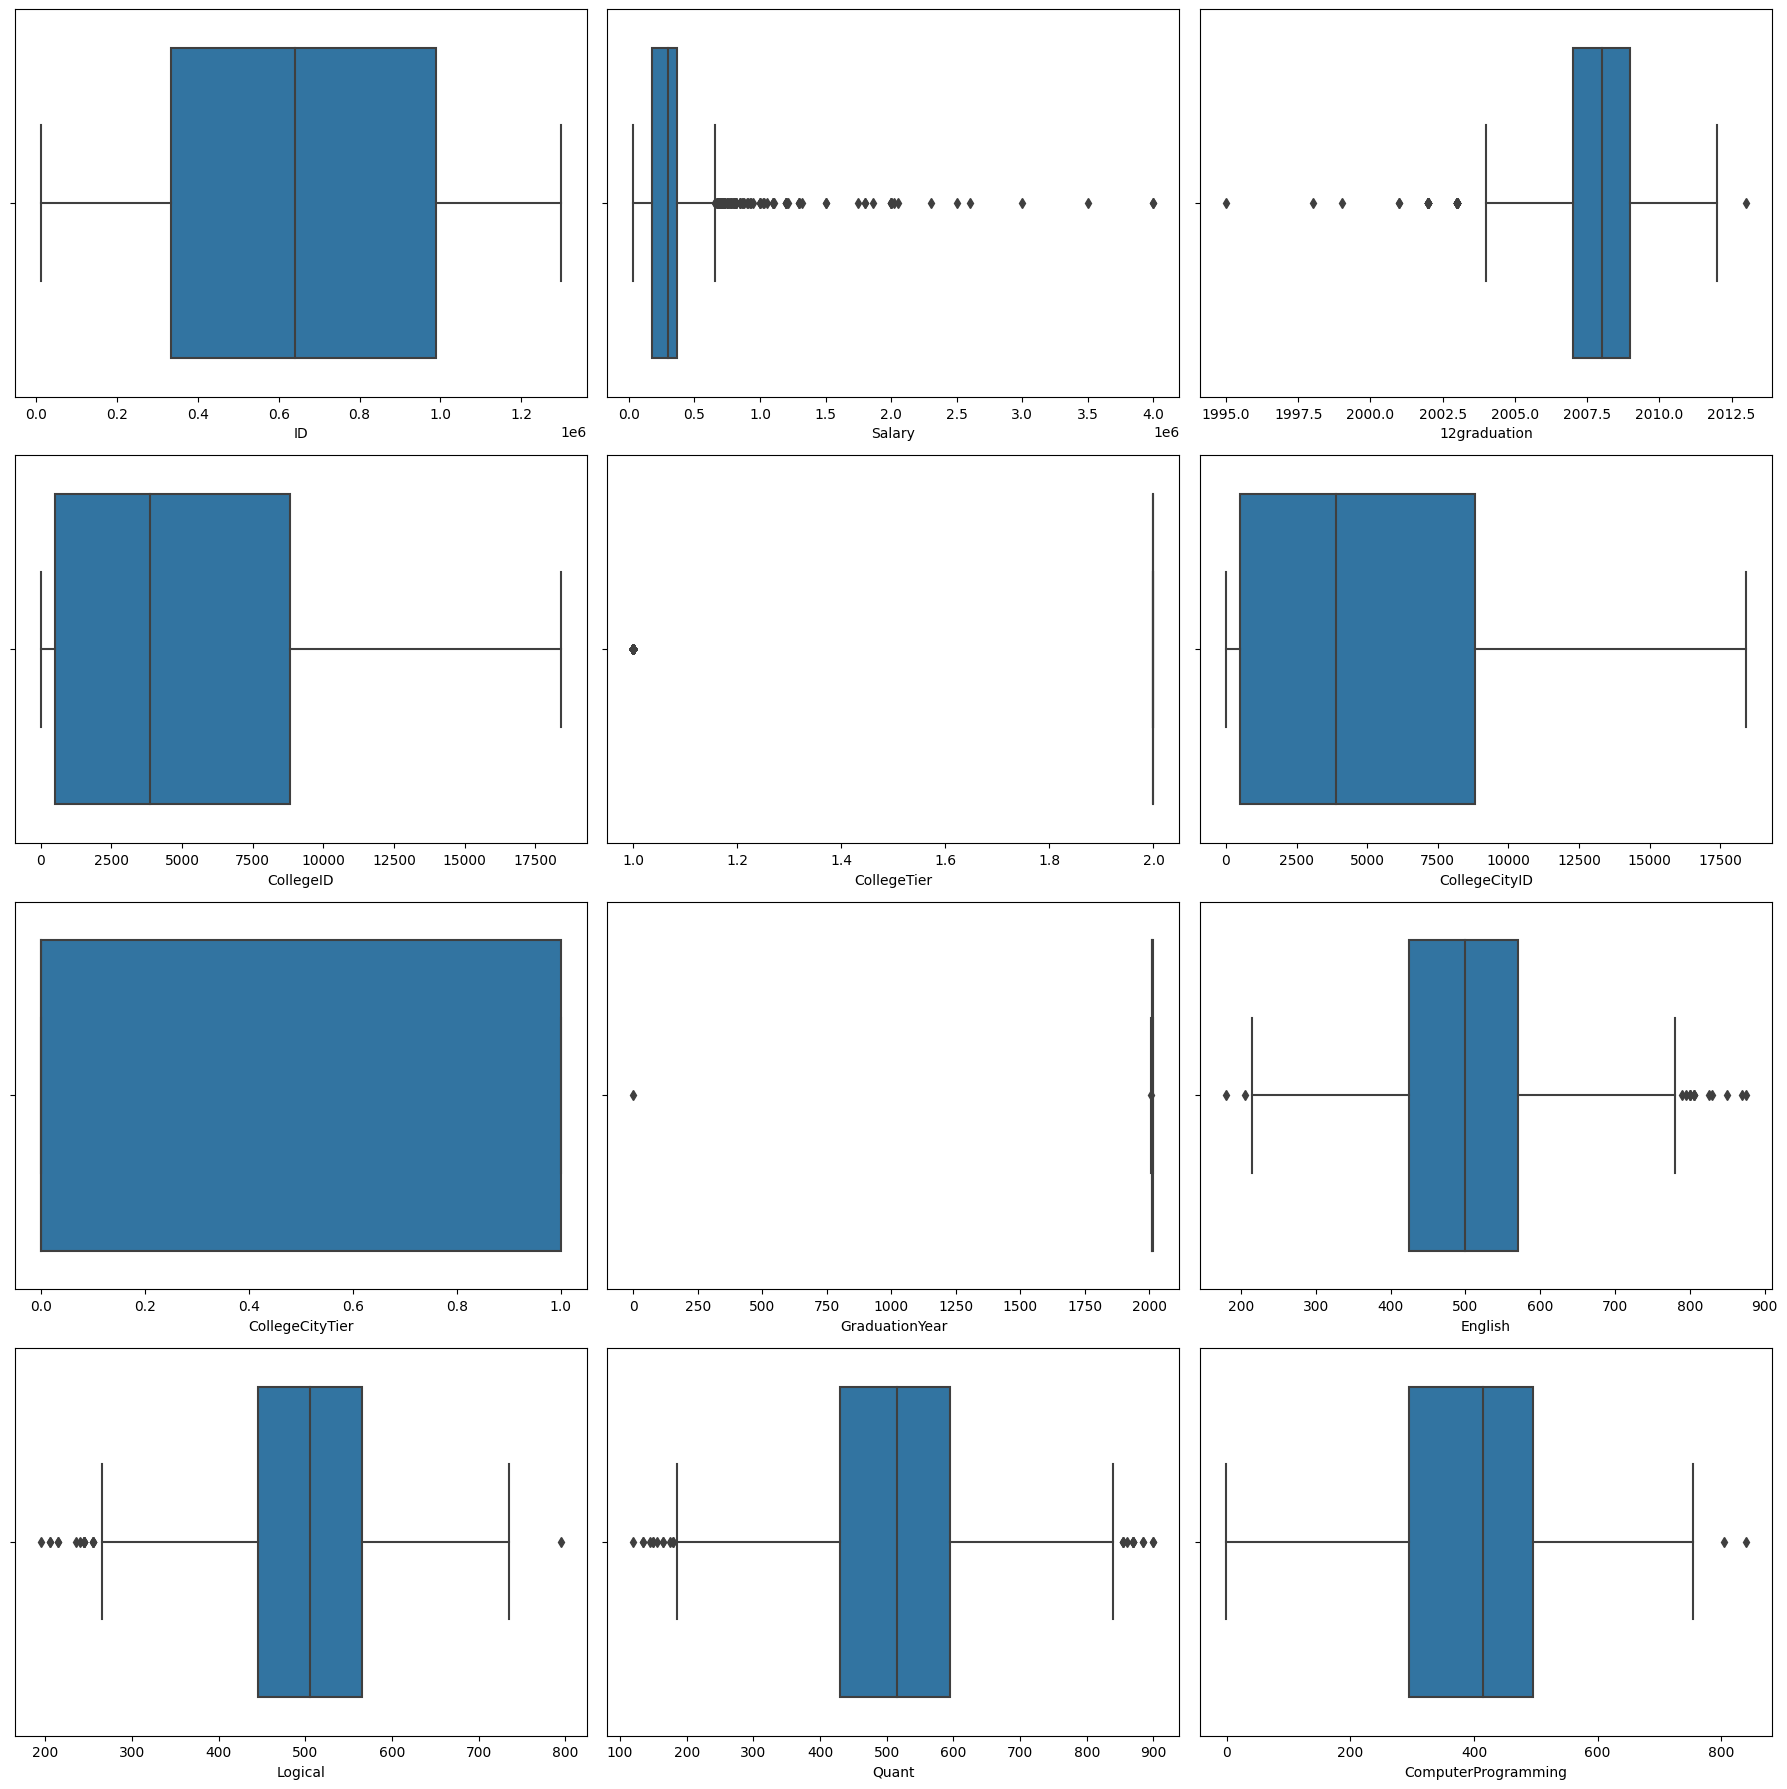

In [ ]:
l = df.select_dtypes(include=['int64']).columns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))

for i, ax in enumerate(axes.flatten()):
    if i < len(l):
        sns.boxplot(x=df[l[i]], ax=ax)
    else:
        ax.axis('off')
    
plt.tight_layout()
plt.show()


- from the above boxplots of numerical columns we can see that we have outliers in salary and other contnuous features.

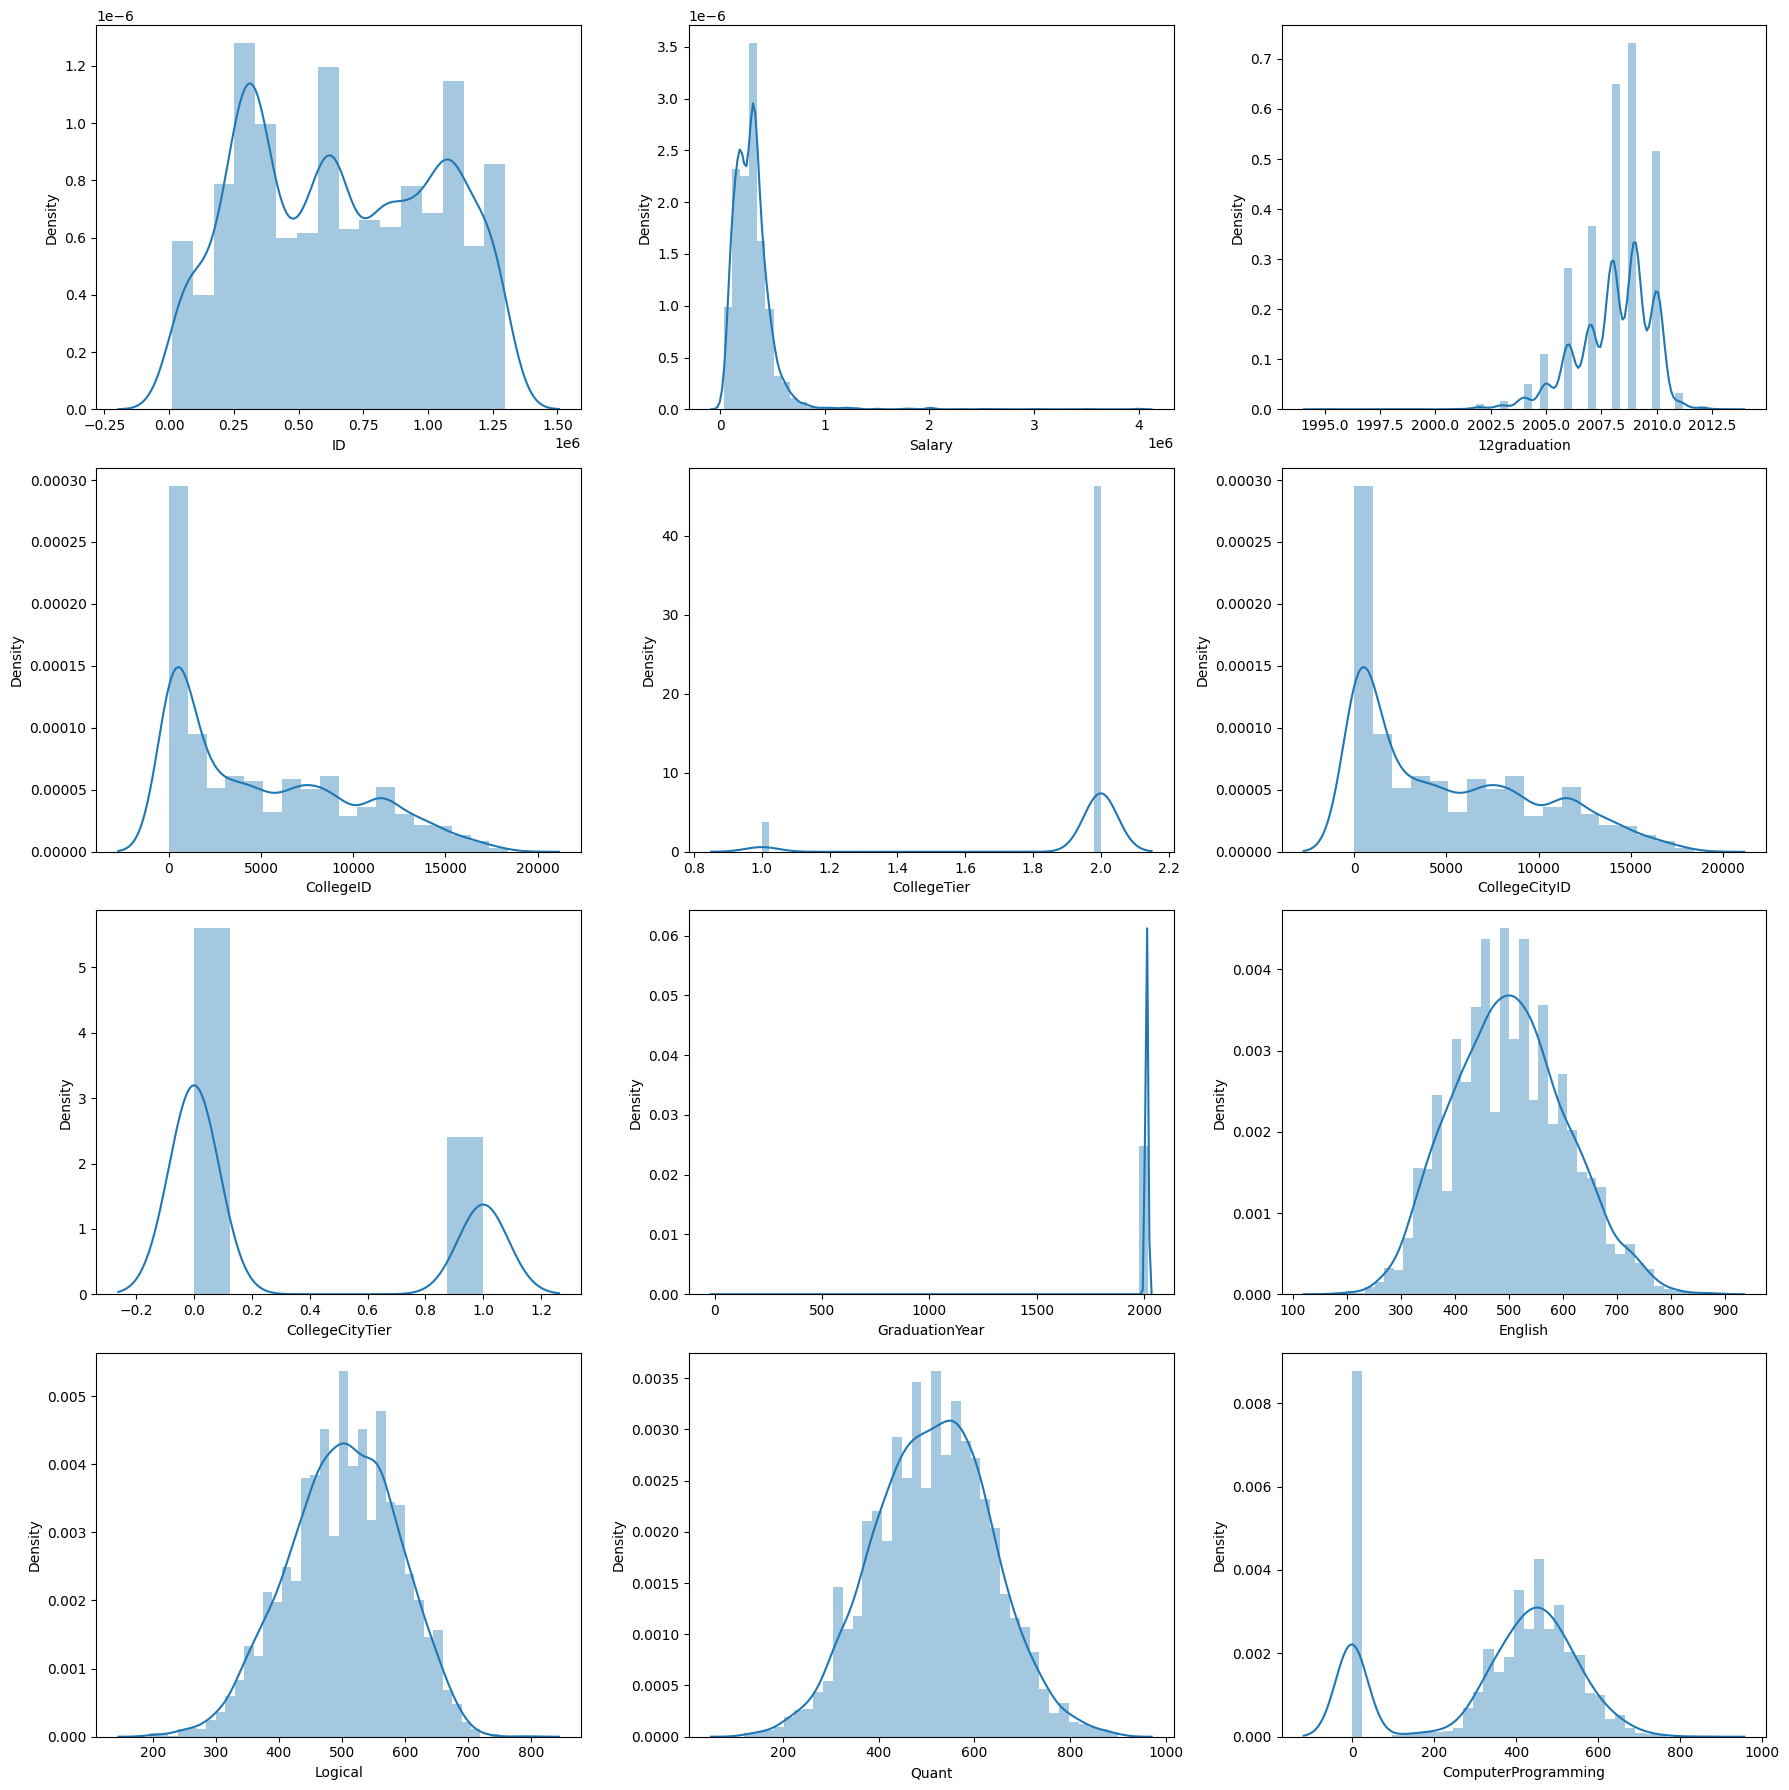

In [ ]:
l = df.select_dtypes(include=['int64']).columns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))

for i, ax in enumerate(axes.flatten()):
    if i < len(l):
        sns.distplot(x=df[l[i]], ax=ax)
        ax.set_xlabel(l[i])
    else:
        ax.axis('off')
    
plt.tight_layout()
plt.show()


- From above Distibution pllots we can see that English,logical and Quant scores follows normal distribution.

<AxesSubplot:xlabel='CollegeCityTier', ylabel='count'>

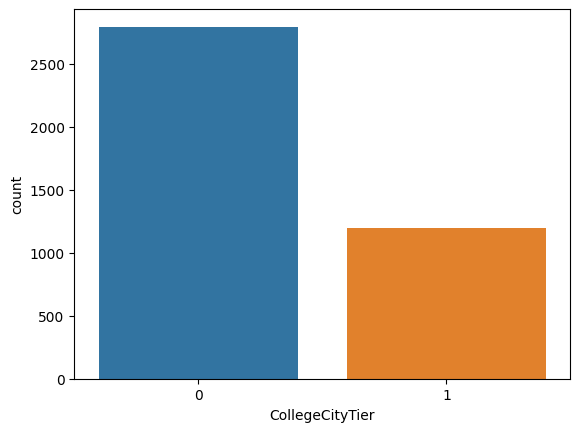

In [ ]:
sns.countplot(df['CollegeCityTier'])

- Above graph shows that most of the students are graduated from 0 Tier College City.

# Bivariate Analysis

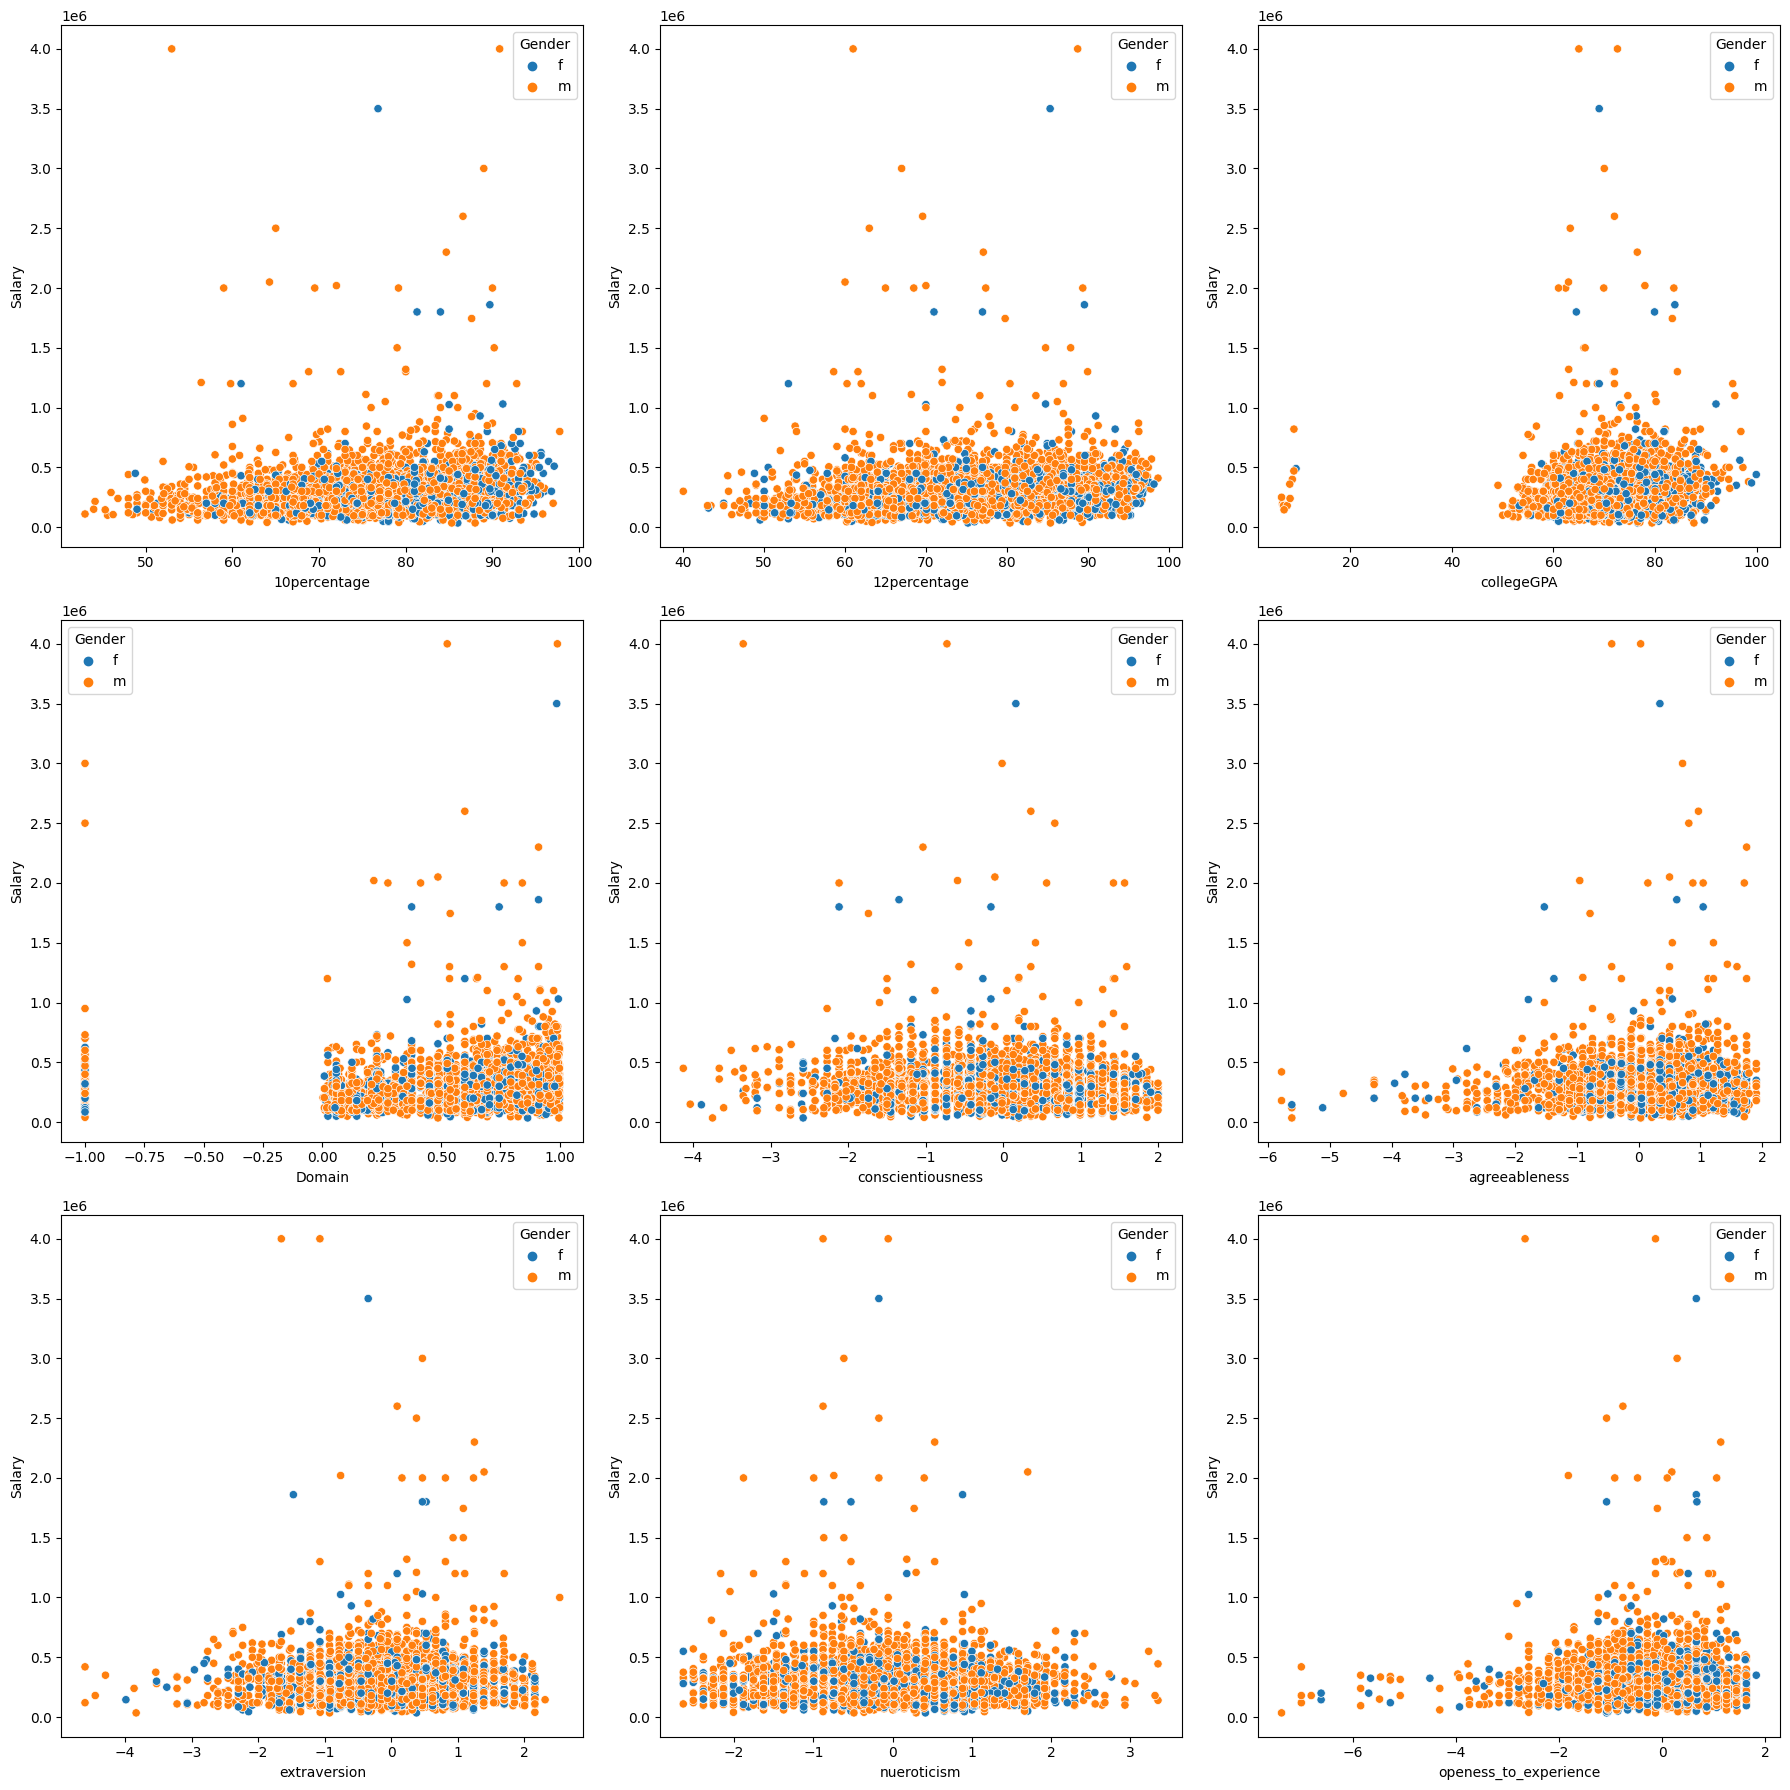

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns of float64 data type
float_cols = df.select_dtypes(include=['float64']).columns

# Define the number of rows and columns for subplots
n_rows = (len(float_cols) + 2) // 3  # Round up to the nearest integer
n_cols = 3

# Create subplots with specified dimensions
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 6*n_rows))

# Iterate through float64 columns and create scatter plots
for i, ax in enumerate(axes.flatten()):
    if i < len(float_cols):
        sns.scatterplot(x=df[float_cols[i]], y=df['Salary'],hue=df['Gender'] ,ax=ax)
        ax.set_xlabel(float_cols[i])
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


- Above scatter plots shows the relationship between Salary and other features from dataset and we can see that 10persentages ,collegeGPA, and 12thpercentage of students having some relation with salary and other features are also having slight relation with salary nut they are not linaer with salary.

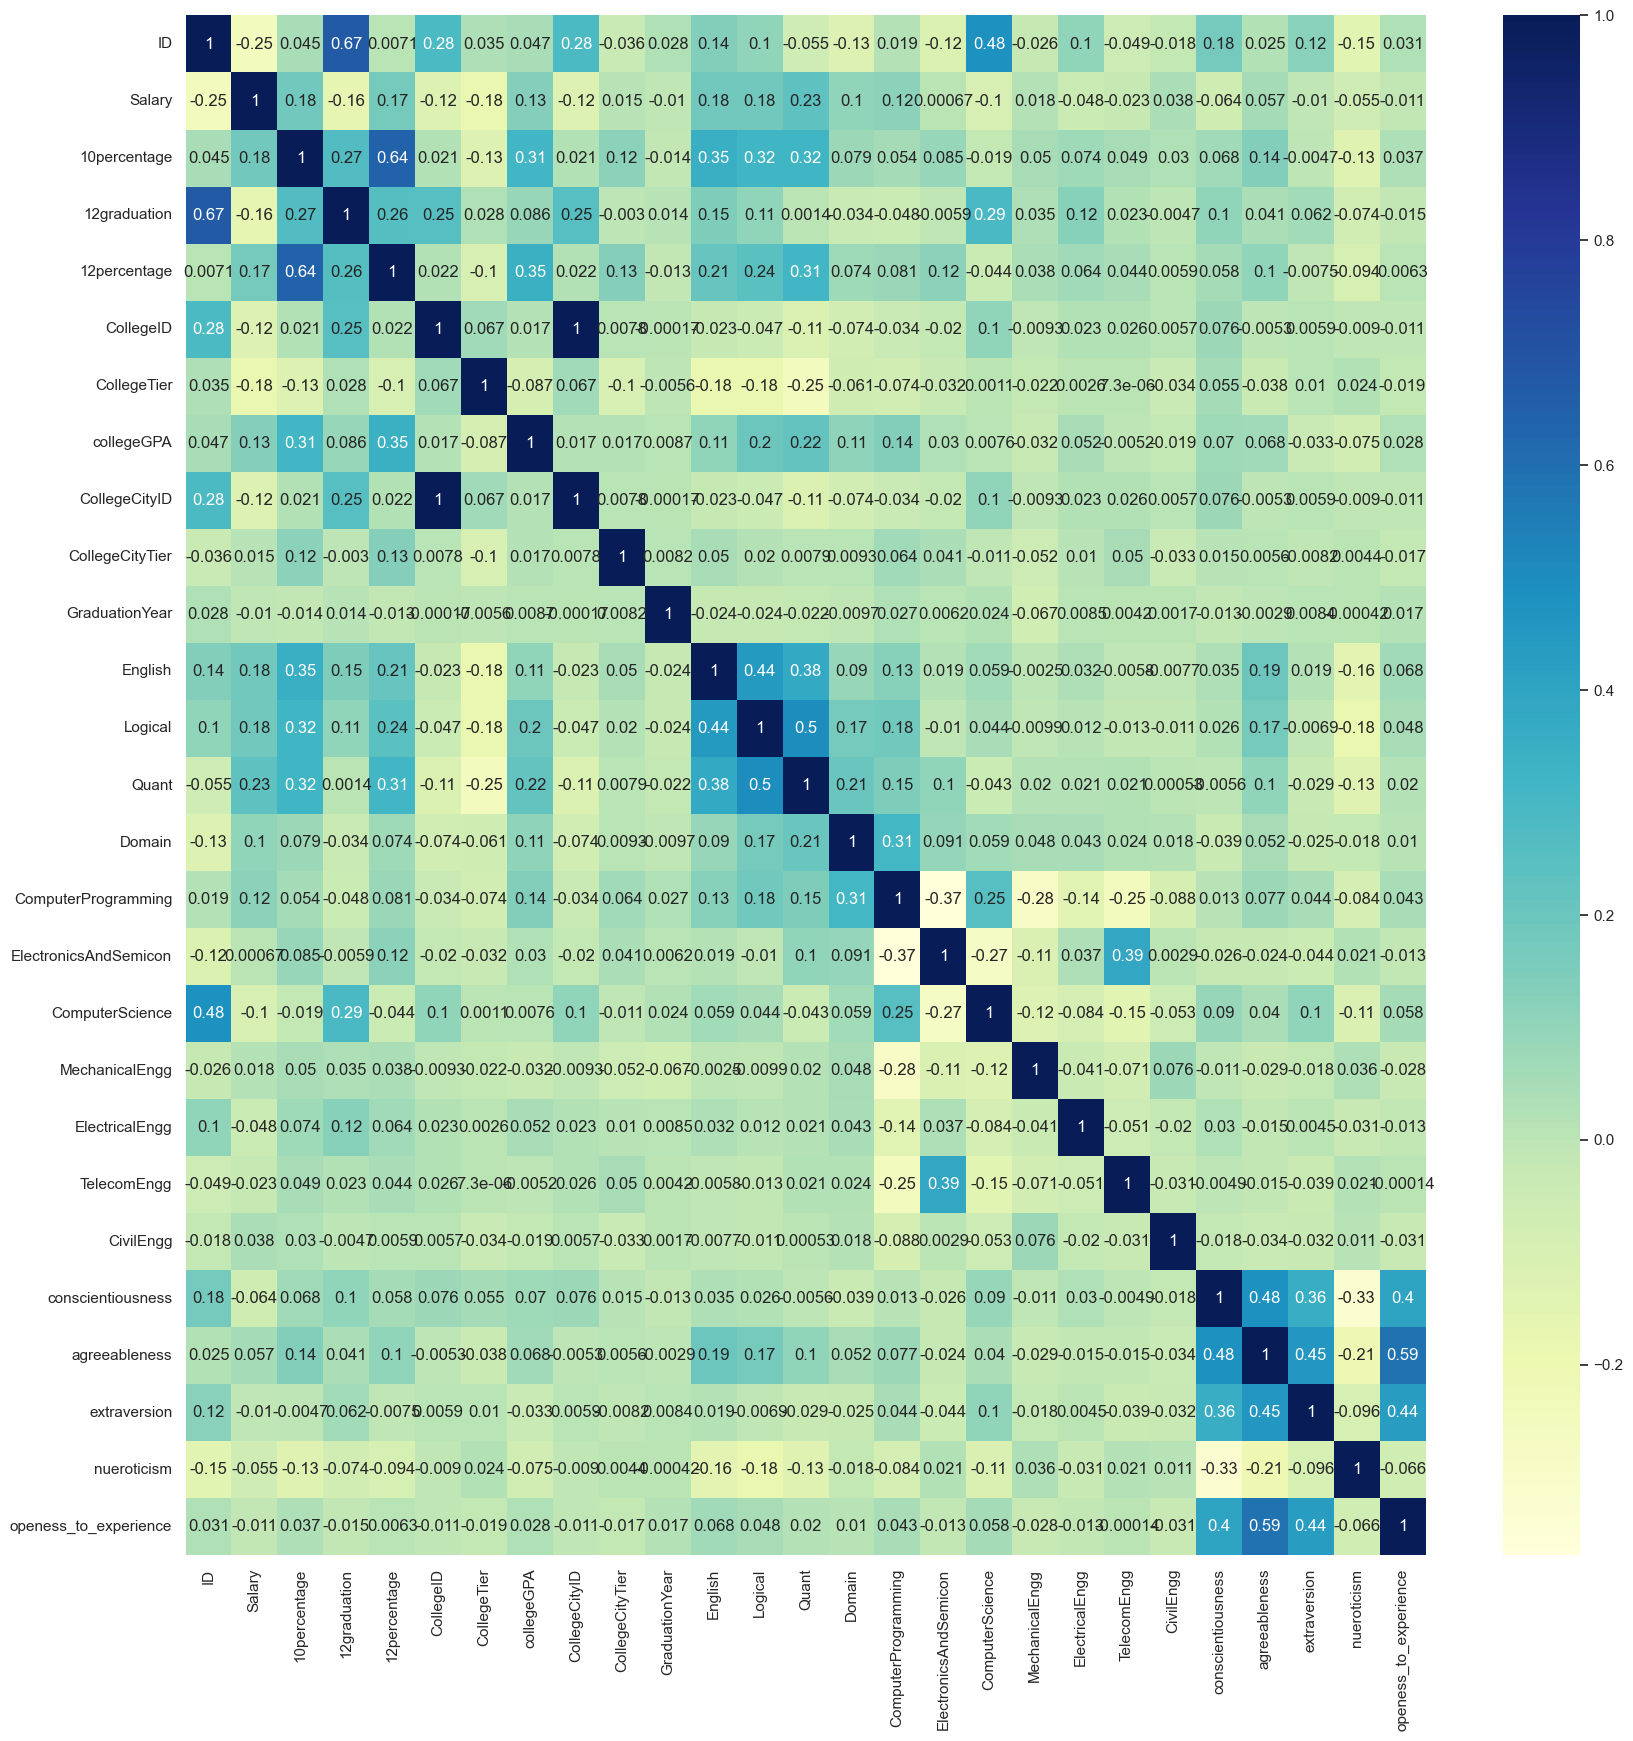

In [ ]:
sns.set(style="white")
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

# Show the plot
plt.show()

- The heatmap above represents the correlation between different features of the data. The darker colors indicate strong positive correlation while the lighter colors indicate weak correlation. From the heatmap, it can be observed that the 10th percentage of students is strongly correlated with their 12th percentage, and the Quant scores are correlated with Logical scores. Additionally, there is a strong positive correlation between openness to experience and agreeableness.

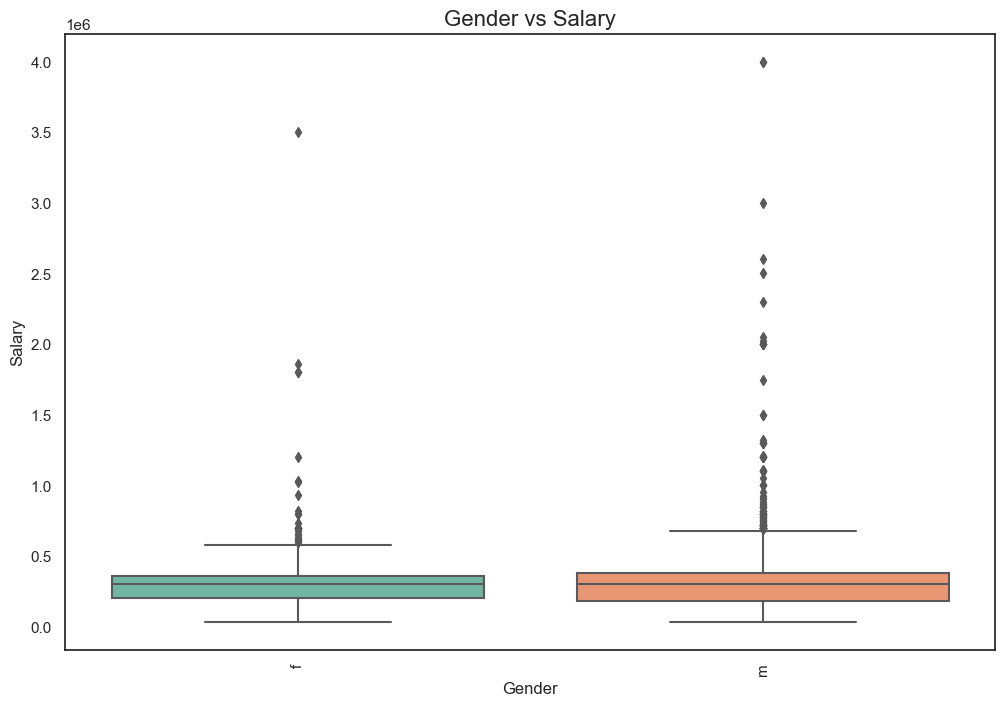

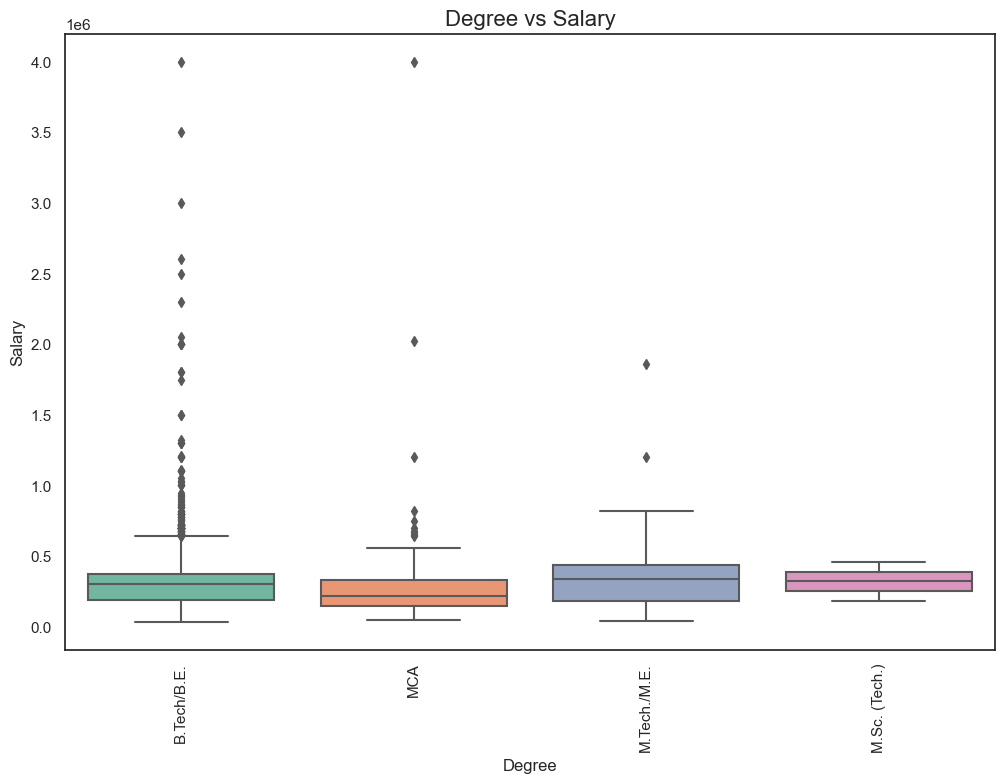

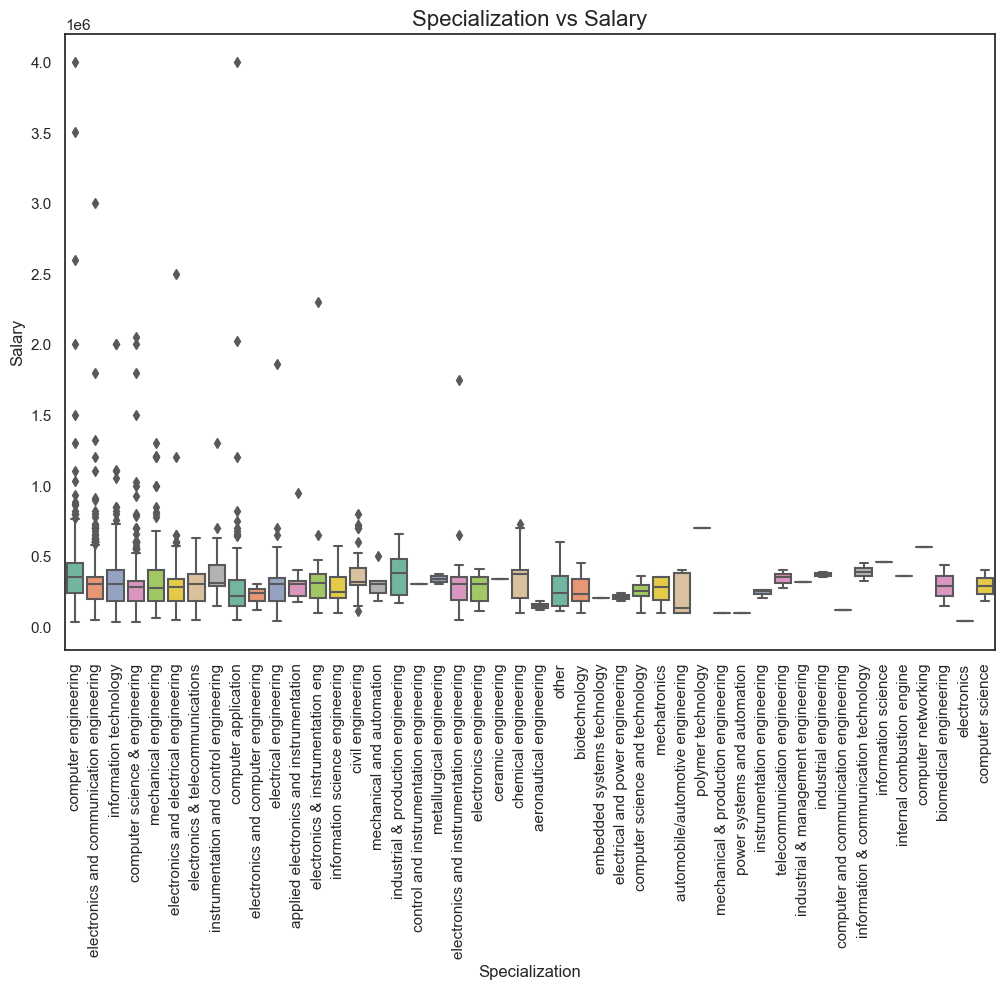

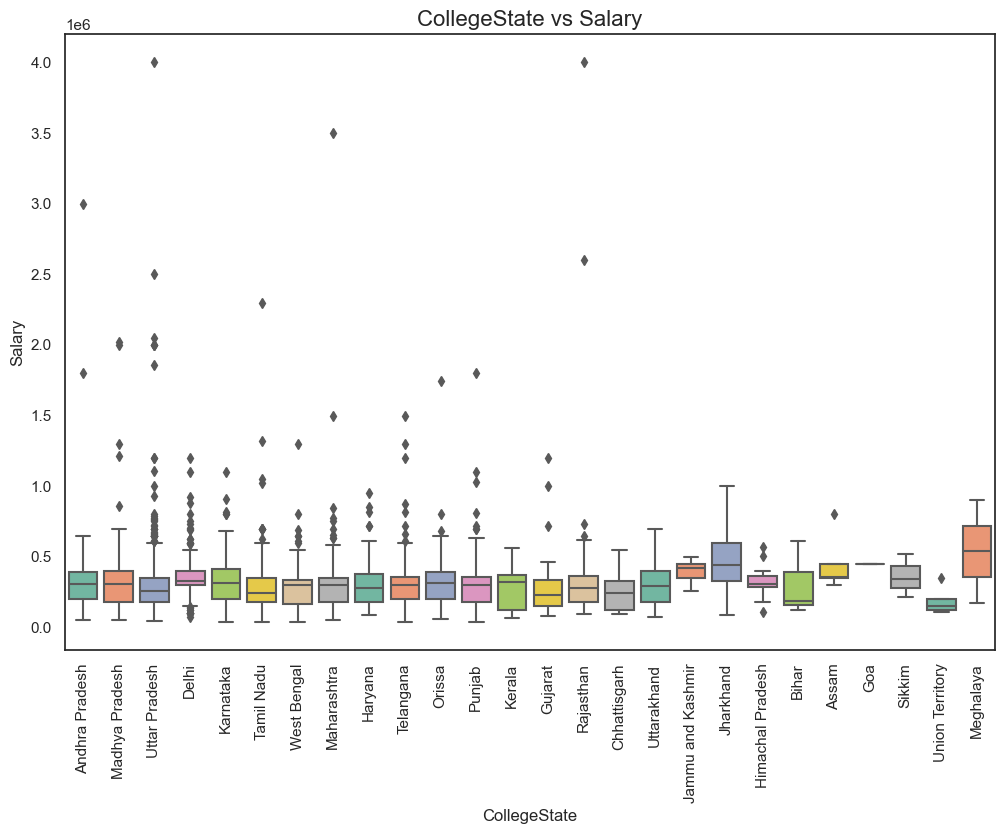

In [ ]:
categorical_columns = ['Gender', 'CollegeTier', 'CollegeCityTier', 'Degree', 'Specialization', 'CollegeState']

for column in categorical_columns:
    if df[column].dtype == 'object':
        plt.figure(figsize=(12,8))
        sns.boxplot(x=column, y='Salary', data=df, palette='Set2')
        plt.xticks(rotation='vertical')
        plt.title(f'{column} vs Salary', fontsize=16)
        plt.show()


- After analyzing the above box plots, we can observe that there is a variation in salaries based on gender, degree, specialization, and college state, despite the presence of outliers.

In [ ]:
fig=pd.crosstab(df['CollegeState'],df['Degree']).iplot(kind = 'bar',title = 'College state vs Degree',asFigure=True)
pio.write_image(fig, 'CollegeStateVsDegree.png')

College state vs degree


- As we can observe from the plot Uttar Pardesh has most of the B.Tech/B.E graduates .

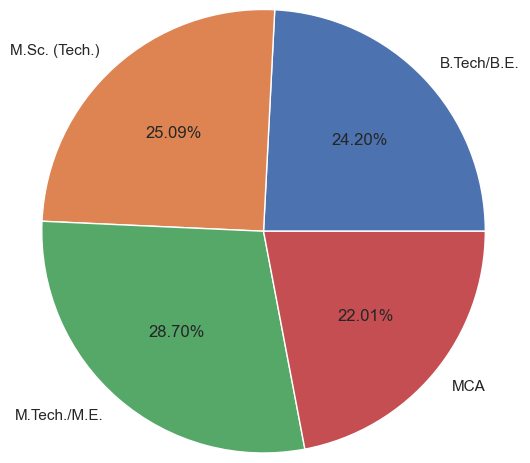

In [ ]:
b=df.groupby(['Degree'])['Salary'].mean()
fig=plt.pie(b,labels=b.index,autopct = '%1.2f%%',radius = 1.5)

- The above Pie chart shows mean salary of different Degree.

In [ ]:
df1=df.copy()

In [ ]:
fig = px.scatter(df, y='JobCity', x='Salary')
pio.write_image(fig,'JobcityVsSal.png')

![Job city vs Salary](images/JobcityVsSal.png)

- From the above graph we can observe that most of the students from Banglore are having more salry.

In [ ]:
fig = px.scatter(df, x='Designation', y='Salary')
fig.update_layout(title='Designation vs Salary', xaxis_title='Designation', yaxis_title='Salary')
pio.write_image(fig,'DesignationVsSal.png')

![Designation vs Salary](images/DesignationVsSal.png)

- From the above graph we can observe that there is no such strong relation between Designation and Salary but senior quality engineer and quality assurance tester and android developer are having good salary .

In [ ]:
fig = px.box(df, x='10board', y='Salary')
fig.update_layout(title='10board vs Salary', xaxis_title='10board', yaxis_title='Salary')
pio.write_image(fig,'10BoardVsSal.png')

![10 Board Vs Salary](images/10BoardVsSal.png)

In [ ]:
fig = px.box(df, x='12board', y='Salary')
fig.update_layout(title='12board vs Salary', xaxis_title='12board', yaxis_title='Salary')
pio.write_image(fig,'12BoardVsSal.png')

![12 Board Vs Salry](images/12BoardVsSal.png)

- From the above graphs we can observe that 12 board such as board of international education anf up board are having more salary but there is no such strong relation between salary and 10 and 12 board.

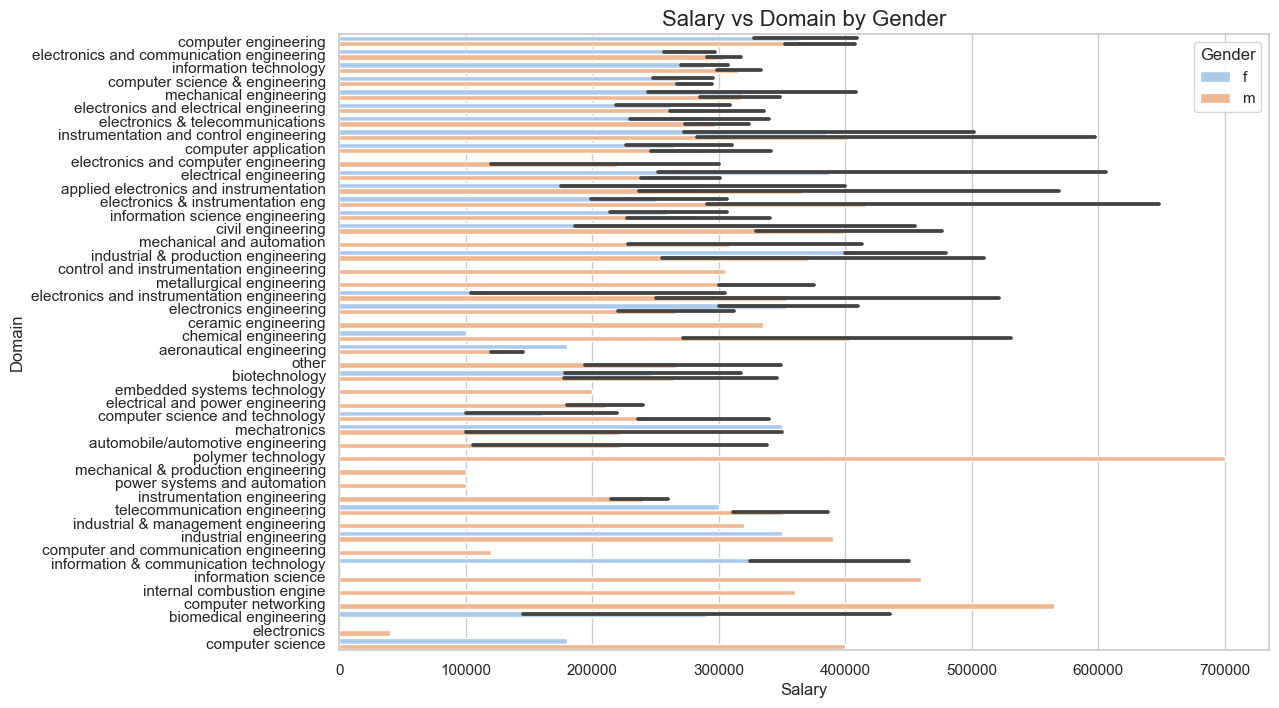

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Salary', y='Specialization', hue='Gender', palette='pastel')
plt.title('Salary vs Domain by Gender', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Domain', fontsize=12)
plt.legend(title='Gender')
plt.show()


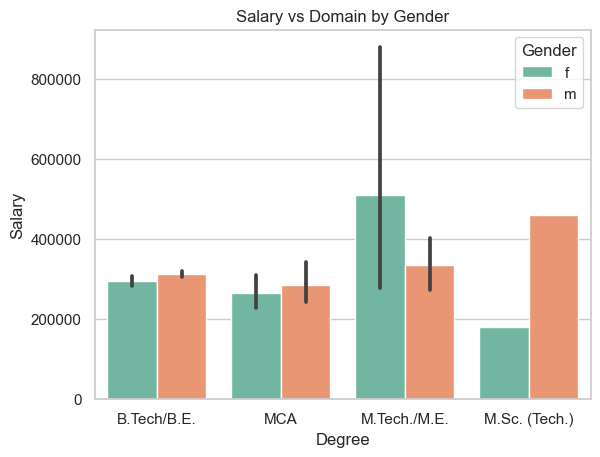

In [ ]:
sns.barplot(x='Degree', y='Salary', hue='Gender', data=df, palette='Set2')
plt.title('Salary vs Domain by Gender')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

- From the above plot we can see that mostly females are M.tech/M.E and mostly males are M.Sc.(Tech)  

In [ ]:
fig = px.scatter(df, x='collegeGPA', y='Salary', color='Gender')
fig.update_layout(title='College GPA vs Salary by Gender', xaxis_title='College GPA', yaxis_title='Salary')
pio.write_image(fig,'collegeGPAVsSal.png')

![College GPA vs Salary](images/collegeGPAVsSal.png)

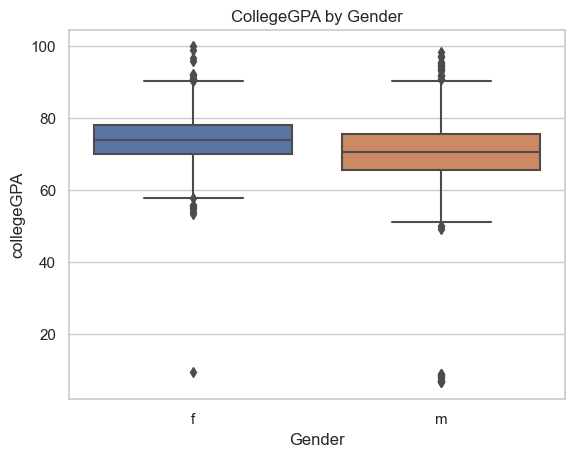

In [ ]:

sns.boxplot(x='Gender', y='collegeGPA', data=df)
plt.title('CollegeGPA by Gender')
plt.show()


- From the above plot shows that GPA of males and females is not having much difference.

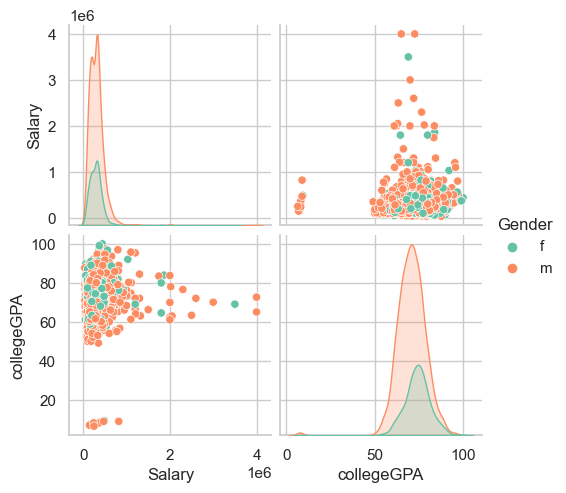

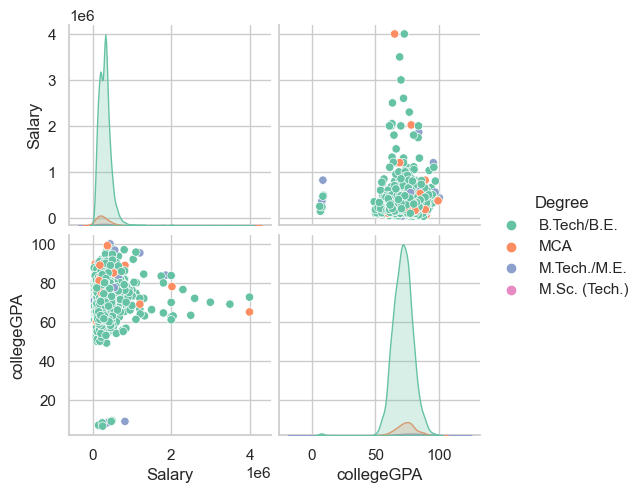

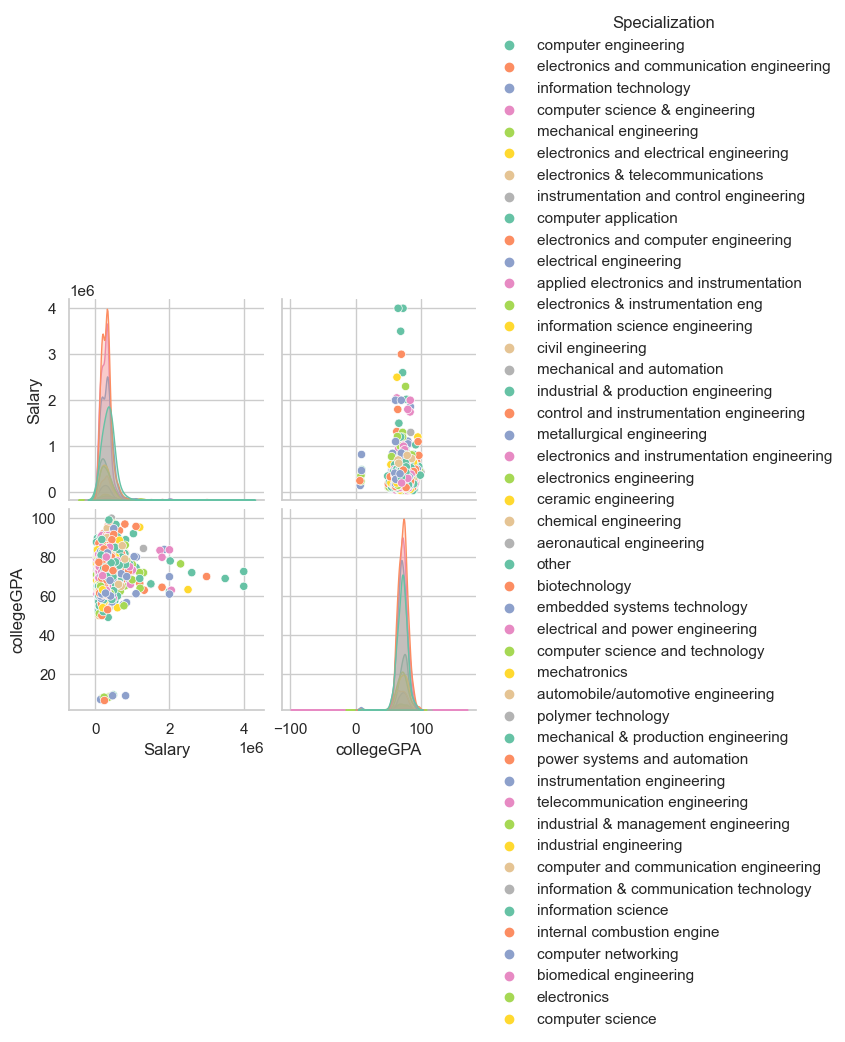

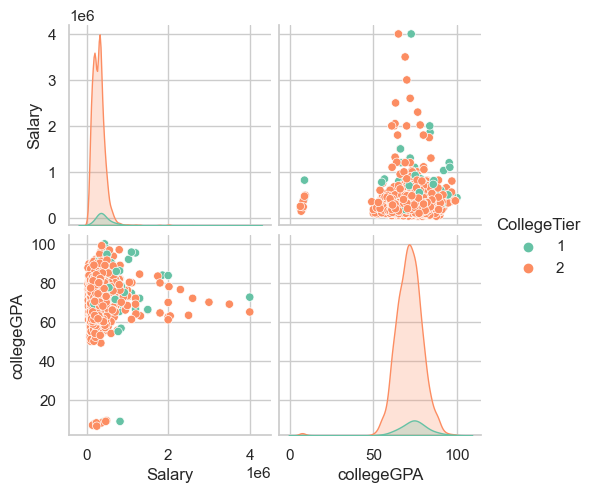

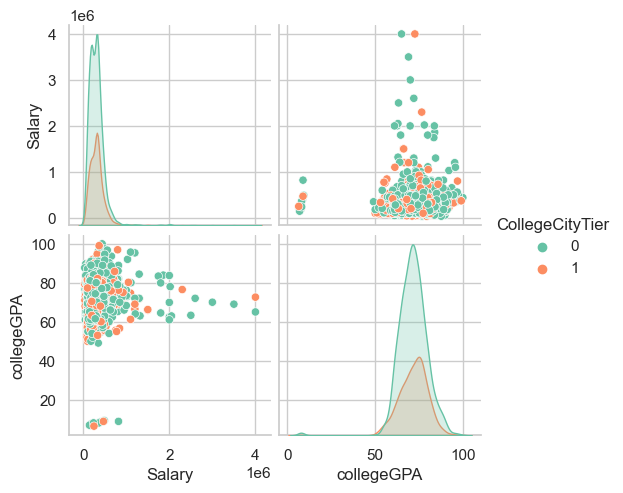

In [ ]:
# Select the columns to analyze
columns = ['Gender', 'Degree', 'Specialization', 'CollegeTier', 'CollegeCityTier']

# Plot the pairplot for the selected columns
sns.pairplot(df, vars=['Salary', 'collegeGPA'], hue='Gender', palette='Set2')
sns.pairplot(df, vars=['Salary', 'collegeGPA'], hue='Degree', palette='Set2')
sns.pairplot(df, vars=['Salary', 'collegeGPA'], hue='Specialization', palette='Set2')
sns.pairplot(df, vars=['Salary', 'collegeGPA'], hue='CollegeTier', palette='Set2')
sns.pairplot(df, vars=['Salary', 'collegeGPA'], hue='CollegeCityTier', palette='Set2')
plt.show()


<AxesSubplot:xlabel='Degree', ylabel='Domain'>

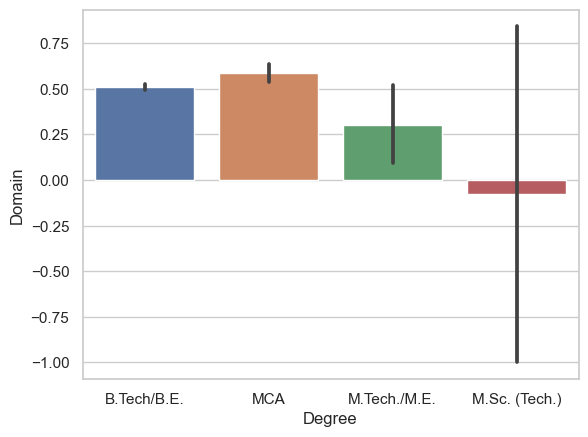

In [ ]:
sns.barplot(x=df['Degree'],y = df['Domain'])

- From the above barplot we can observe that MCA graduates are scoring high in there respective Domain .

In [ ]:
data = df.copy()

In [ ]:
data.head(1)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.0,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455


 # Research Questions

- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.

In [ ]:
data['Designation'].value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [ ]:
filter_data = data.loc[data['Designation'].isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer'])]

In [ ]:
filter_data.head(2)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
19,466888,325000,2014-09-01,present,software engineer,Pune,f,1990-11-30,79.0,cbse,2008,62.20,cbse,7977,2,B.Tech/B.E.,computer engineering,76.30,7977,0,Uttar Pradesh,2012,485,445,435,0.864685,525,-1,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.4078,-0.1295
20,140069,320000,2010-11-01,2012-09-01 00:00:00,software engineer,Bangalore,f,1988-07-25,91.2,karnataka secondary school of examination,2006,84.63,karnataka pre university board,4437,2,B.Tech/B.E.,computer engineering,78.15,4437,0,Karnataka,2010,455,535,445,0.635979,445,-1,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.2902,0.3444


In [ ]:
filter_data['Designation'].value_counts()

software engineer     539
programmer analyst    139
hardware engineer       8
associate engineer      6
Name: Designation, dtype: int64

In [ ]:
avg_sal = filter_data['Salary'].median()

In [ ]:
avg_sal

325000.0

In [ ]:
if avg_sal >= 250000 and avg_sal <= 300000:
    print("The claim is true.")
else:
    print("The claim is false.")


The claim is false.


<AxesSubplot:>

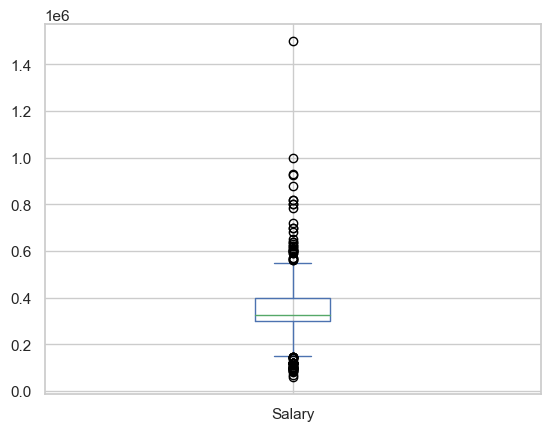

In [ ]:
filter_data['Salary'].plot(kind='box')

In [ ]:
filter_data['Salary'].median()

325000.0

In [ ]:
from scipy import stats

# calculate z-scores for the salary column
z_scores = stats.zscore(filter_data['Salary'])

# find absolute z-scores greater than 3 (or any other threshold you choose)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2)

# create a new dataframe with only the filtered entries
df_filtered = filter_data[filtered_entries]


<AxesSubplot:xlabel='Salary'>

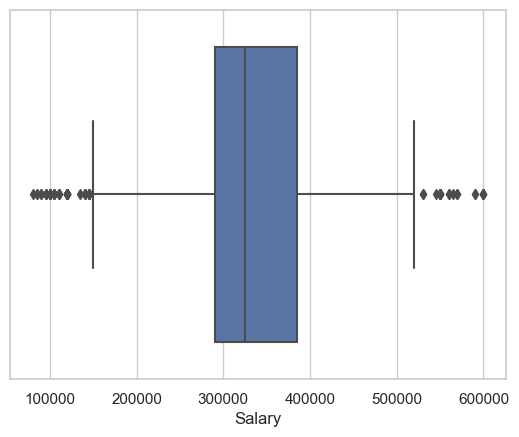

In [ ]:
sns.boxplot(df_filtered['Salary'])

In [ ]:
df_filtered['Salary'].mean()

325809.5952023988

In [ ]:
df_filtered['Salary'].median()

325000.0

In [ ]:
df_filtered.shape

(667, 38)

## Hypothesis Testing [T-test]

- Null Hypothesis (Ho):The average salary of fresh computer science engineering graduates working as Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer is less than or equal to Rs. 2.5 lakhs per annum. 

   Ho: mu <= 2.5

- Alternate Hypothesi (Ha):The average salary of fresh computer science engineering graduates working as Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer is less than or equal to Rs. 2.5 lakhs per annum.

    Ha: mu > 2.5

In [ ]:
job_group = df_filtered.groupby('Designation')


In [ ]:
job_salary_mean = job_group['Salary'].mean()

In [ ]:
job_salary_std = job_group['Salary'].std()


In [ ]:
print("Mean salaries for different job roles:")
print(job_salary_mean)
print("\nStandard deviation of salaries for different job roles:")
print(job_salary_std)

Mean salaries for different job roles:
Designation
associate engineer    290000.000000
hardware engineer     281250.000000
programmer analyst    337608.695652
software engineer     323757.281553
Name: Salary, dtype: float64

Standard deviation of salaries for different job roles:
Designation
associate engineer    149097.283677
hardware engineer     128473.176745
programmer analyst     54048.563562
software engineer     107530.238804
Name: Salary, dtype: float64


In [ ]:
from scipy.stats import ttest_ind


In [ ]:
# set the significance level
alpha = 0.05

In [ ]:
from scipy.stats import ttest_1samp

# extract the salary data for each job role
prog_analyst_salaries = df_filtered.loc[df_filtered['Designation'] == 'programmer analyst', 'Salary'].values
software_eng_salaries = df_filtered.loc[df_filtered['Designation'] == 'software engineer', 'Salary'].values
hardware_eng_salaries = df_filtered.loc[df_filtered['Designation'] == 'hardware engineer', 'Salary'].values
assoc_eng_salaries = df_filtered.loc[df_filtered['Designation'] == 'associate engineer', 'Salary'].values

# set the expected salary range according to the claim in the article
expected_range = (250000, 300000)

# perform a one-sample t-test for each job role
for job, salaries in [("programmer analyst", prog_analyst_salaries),
                      ("software engineer", software_eng_salaries),
                      ("hardware engineer", hardware_eng_salaries),
                      ("associate engineer", assoc_eng_salaries)]:
    # perform the one-sample t-test
    t_stat, p_val = ttest_1samp(salaries, expected_range[0], alternative='greater')
    
    # print the results
    print(f"One-sample t-test for {job}:")
    print(f"  t-statistic: {t_stat:.2f}")
    print(f"  p-value: {p_val:.6f}")
    
    # check for statistical significance
    if p_val < 0.05:
        print("  Result: Reject null hypothesis")
    else:
        print("  Result: Fail to reject null hypothesis")


One-sample t-test for programmer analyst:
  t-statistic: 19.04
  p-value: 0.000000
  Result: Reject null hypothesis
One-sample t-test for software engineer:
  t-statistic: 15.57
  p-value: 0.000000
  Result: Reject null hypothesis
One-sample t-test for hardware engineer:
  t-statistic: 0.69
  p-value: 0.256802
  Result: Fail to reject null hypothesis
One-sample t-test for associate engineer:
  t-statistic: 0.66
  p-value: 0.270062
  Result: Fail to reject null hypothesis


### Conclusion

Based on the results of the one-sample t-tests, we can draw the following conclusions:

For programmer analyst and software engineer job roles, we reject the null hypothesis that the mean salary is less than or equal to 250,000 at a significance level of 0.05. This means that there is sufficient evidence to support the claim in the Times of India article that fresh graduates in these job roles can earn up to 2.5-3 lakhs.

For hardware engineer and associate engineer job roles, we fail to reject the null hypothesis that the mean salary is less than or equal to 250,000 at a significance level of 0.05. This means that we do not have sufficient evidence to support the claim in the Times of India article for these job roles. However, it's worth noting that the sample sizes for these job roles are relatively small, which may have affected our ability to detect a significant difference.


### Research Question -2

- Is there a relationship between gender and specialisation? (i.e. Does the preference of
  Specialisation depend on the Gender?)

In [12]:
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

# Perform chi-square test for independence
chi2, pval, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {pval}")
if pval < 0.05:
    print("There is a significant relationship between gender and specialization.")
else:
    print("There is no significant relationship between gender and specialization.")

Chi-square statistic: 104.46891913608455
P-value: 1.2453868176976918e-06
There is a significant relationship between gender and specialization.


Hence , there is a significant realtionship between gender and specializtion.